In [27]:
import matplotlib.pyplot as plt
import json
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
tokenized_items = json.load(open("pretrain_data/preprocess/tokenized_items_meta_data.json"))

In [5]:
tokenized_items

{'7138258879': [[14691,
   9682,
   1459,
   6313,
   268,
   361,
   947,
   2253,
   1242,
   131,
   1178,
   176,
   947,
   2253,
   1242,
   131,
   939,
   12,
   35707,
   3586,
   208,
   11979,
   347,
   40236,
   1502,
   337,
   312,
   13917,
   111,
   735,
   111,
   132,
   11638,
   9682,
   1459,
   6313,
   268,
   42747,
   39184,
   9719,
   3015,
   33989,
   40356,
   163,
   33004,
   312,
   23601,
   6,
   1502,
   1536,
   359,
   15683,
   2580],
  [1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   1,
   2,
   2,
   2,
   2,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2]],
 '7138258917': [[14691,
   9682,
   1459,
   6313,
   268,
   361,
   947,
   2253,
   1242,
   131,
   1178,
   176,
   947,
   2253,
   1242,
   131,
   939,
   12,
   35707,
   3586,
   14010,
   1

In [7]:
i = 0
for item_id in tokenized_items:
    input_ids, token_type_ids = tokenized_items[item_id]
    print(len(input_ids), len(token_type_ids))
    i += 1
    if i == 10:
        break

53 53
53 53
53 53
55 55
53 53
42 42
43 43
54 54
37 37
39 39


In [10]:
lengths = [len(tokenized_items[item_id][0]) for item_id in tokenized_items]

In [11]:
length_df = pd.DataFrame(data=lengths, columns=["length"])
length_df.describe()

,length
count,1.022274e+06
mean,4.133792e+01
std,1.157272e+01
min,5.000000e+00
25%,3.300000e+01
50%,4.300000e+01
75%,5.000000e+01
max,8.400000e+01


<Axes: xlabel='length', ylabel='Count'>

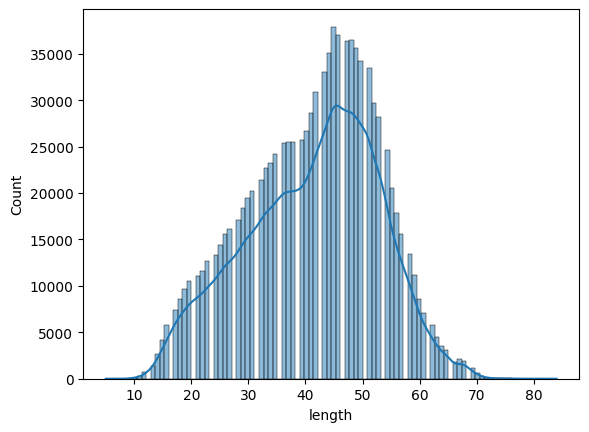

In [19]:
sns.histplot(length_df, bins=100, kde=True, x="length")

In [20]:
train = json.load(open("pretrain_data/train.json"))

In [21]:
train

[['B000VZGTPY',
  'B000VZGTPY',
  'B003O6SJEQ',
  'B00BFI5SE4',
  'B00GURJZZI',
  '7138258879',
  'B000K1PKFY',
  'B000M5X0IM',
  'B000OCT7FI',
  'B000PTKONY',
  'B000WJFF6S',
  'B000WJFF6S',
  'B002ZTGLCK',
  'B0031BW7Y2',
  'B006VXZQXG',
  'B00D7N8HRK',
  'B00EO1F9I4',
  'B00V6X30SE',
  'B000C9WJ8K',
  'B000CSIRXW',
  'B00A6G5SB4',
  'B00E7AKKCM',
  'B004323RQK',
  'B005CWSBT8',
  'B00UCY60GW',
  'B004EIDD2Q'],
 ['B0006SU3QW',
  'B004BRKF7Q',
  'B00BG423YA',
  'B001GX9U3S',
  'B00BW309A0',
  'B008WG5SLK',
  'B009F10S3Y',
  '7138258917',
  'B00VY6P0KO',
  'B011M9YMP6',
  'B0068C5OO6',
  'B006XD6Y4Y',
  'B012C6HP6Q',
  'B000WJWWQY',
  'B002R0N7CO',
  'B01FQXBSA6'],
 ['B00RV417XM',
  'B0080DFZJK',
  'B00OH0S5Y2',
  'B0125FM0XC',
  'B01DERCKKS',
  '7138258917',
  'B003ZBJ5Y8',
  'B00D7XNQHG',
  'B00HE6CI58',
  'B017C6B5H6',
  'B00PGRGSH6',
  'B00EAOIKVI'],
 ['B001DKRGLM', 'B001O08ADO', 'B008BM3CYU', 'B003UT0L7A', '7138258917'],
 ['7138258917',
  'B00OVL957I',
  'B00P34B6GA',
  'B00SXKS9F

In [26]:
train_lengths = [len(t) for t in train]

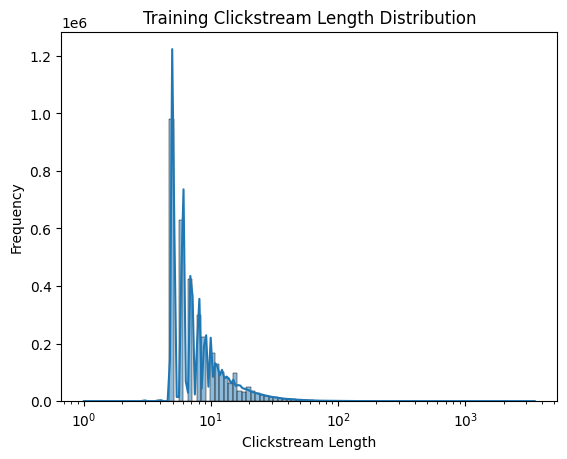

In [23]:
axe = sns.histplot(train_lengths, bins=100, kde=True, log_scale=True)
axe.set_title("Training Clickstream Length Distribution")
axe.set_xlabel("Clickstream Length")
axe.set_ylabel("Frequency")
plt.show()

In [28]:
print("Average clickstream length:", np.mean(train_lengths))
print("Median clickstream length:", np.median(train_lengths))
print("Max clickstream length:", np.max(train_lengths))
print("Min clickstream length:", np.min(train_lengths))
print("Standard deviation of clickstream length:", np.std(train_lengths))

Average clickstream length: 9.222056548471567
Median clickstream length: 7.0
Max clickstream length: 3508
Min clickstream length: 1
Standard deviation of clickstream length: 10.177651990418067


In [29]:
dev = json.load(open("pretrain_data/dev.json"))
dev_lengths = [len(d) for d in dev]

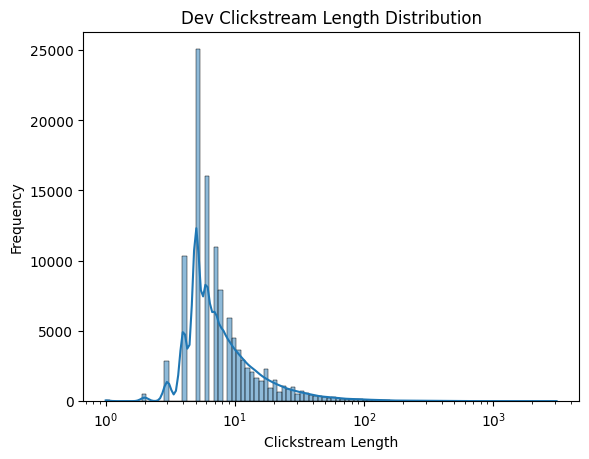

In [30]:
axe = sns.histplot(dev_lengths, bins=100, kde=True, log_scale=True)
axe.set_title("Dev Clickstream Length Distribution")
axe.set_xlabel("Clickstream Length")
axe.set_ylabel("Frequency")
plt.show()

In [31]:
print("Average clickstream length:", np.mean(dev_lengths))
print("Median clickstream length:", np.median(dev_lengths))
print("Max clickstream length:", np.max(dev_lengths))
print("Min clickstream length:", np.min(dev_lengths))
print("Standard deviation of clickstream length:", np.std(dev_lengths))

Average clickstream length: 11.540278877726266
Median clickstream length: 7.0
Max clickstream length: 3094
Min clickstream length: 1
Standard deviation of clickstream length: 28.406195062929072


In [32]:
length_df = pd.DataFrame(data={
    "length": train_lengths + dev_lengths,
    "dataset": ["train"] * len(train_lengths) + ["dev"] * len(dev_lengths)
}, columns=["length", "dataset"])

In [33]:
length_df

,length,dataset
0,26,train
1,16,train
2,12,train
3,5,train
4,15,train
...,...,...
3613901,2,dev
3613902,3,dev
3613903,7,dev
3613904,1,dev


<Axes: xlabel='length', ylabel='Count'>

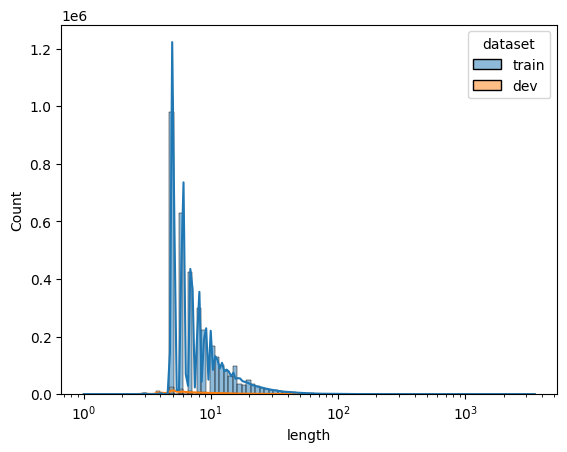

In [34]:
sns.histplot(data=length_df, x="length", hue="dataset", bins=100, kde=True, log_scale=True)